In [24]:
import pandas as pd
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta
from plotnine import *

In [257]:
df = pd.read_csv('..\data\data_rfm.csv', header=0)

In [261]:
df[['usuario_id_crp', 'freq_all_1', 'mon_all_1']]

,usuario_id_crp,freq_all_1,mon_all_1
0,11,4,36772.0
1,11,1,1090.0
2,11,2,14080.0
3,11,6,60800.0
4,11,6,59314.0
...,...,...,...
261207,3304635,1,13490.0
261208,3304673,2,37950.0
261209,3304679,1,15990.0
261210,3304696,1,13490.0


In [162]:
df_2 = df.groupby('usuario_id_crp').sum()

In [183]:
df_3 = df_2[df_2['freq_all_1'] != 1]

In [186]:
df_3.shape

(45030, 138)

In [185]:
df_3.freq_all_1.value_counts(1)

2      0.311037
3      0.155074
4      0.098201
5      0.066111
6      0.051721
         ...   
137    0.000022
202    0.000022
337    0.000022
203    0.000022
149    0.000022
Name: freq_all_1, Length: 177, dtype: float64

In [188]:
start_date = date(2020,3,1)
max_date =  date(2022,5,1)
minimum_windows_size = 12

rolling = True

start_train = start_date
end_train = start_train + relativedelta(months=minimum_windows_size) #- relativedelta(days=1)
test = start_train + relativedelta(months=minimum_windows_size+1)

while test <= max_date:
    
    # Set dates
    if rolling == True:
        start_train += relativedelta(months=1)
    
    end_train += relativedelta(months=1)
    test += relativedelta(months=1)
    
    print(start_train, end_train, test)

    # Filtrate DataFrame
    df_train = df[(df['year_month'] >= start_train.strftime('%Y-%m-%d')) & (df['year_month'] <= end_train.strftime('%Y-%m-%d'))]
    df_test = df[df['year_month'] == test.strftime('%Y-%m-%d')]
    
    # Drop year_month
    df_train.drop(columns='year_month', inplace=True)
    df_test.drop(columns='year_month', inplace=True)
    
    # Grouping Data
    df_train = df_train.groupby('usuario_id_crp').sum()
    df_test = df_test.groupby('usuario_id_crp').sum()
    
    df_train = df_train[df_train['freq_all_1'] != 1]

2020-04-01 2021-04-01 2021-05-01


c:\users\ignac\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2020-05-01 2021-05-01 2021-06-01
2020-06-01 2021-06-01 2021-07-01
2020-07-01 2021-07-01 2021-08-01
2020-08-01 2021-08-01 2021-09-01
2020-09-01 2021-09-01 2021-10-01
2020-10-01 2021-10-01 2021-11-01
2020-11-01 2021-11-01 2021-12-01
2020-12-01 2021-12-01 2022-01-01
2021-01-01 2022-01-01 2022-02-01
2021-02-01 2022-02-01 2022-03-01
2021-03-01 2022-03-01 2022-04-01
2021-04-01 2022-04-01 2022-05-01
2021-05-01 2022-05-01 2022-06-01


In [191]:
df_train

,freq_all_1,freq_map_1,freq_panaderia_1,freq_NA_1,freq_bolleria_1,freq_gaseosa_1,freq_empanadita_1,freq_barquillo_1,freq_plato_liviano_1,freq_empanada_individual_1,...,mon_barras_1,mon_familiar_congelado_1,mon_pisco_sour_1,mon_regalo_1,mon_pastas_1,mon_vegetariano_1,mon_mar_1,mon_gnocchi_1,mon_smoothie_1,mon_escabeche_encurtido_1
usuario_id_crp,,,,,,,,,,,,,,,,,,,,,
11,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,83,19.0,36.0,0.0,37.0,4.0,4.0,4.0,2.0,2.0,...,7980.0,34980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,12,9.0,1.0,0.0,0.0,6.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,80,63.0,2.0,0.0,3.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185850,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3187129,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3189179,2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
df_test_scaled = scaler.transform(df_test)

In [210]:
from sklearn.decomposition import NMF

nmf = NMF(verbose=1)
df_nmf = nmf.fit_transform(pd.DataFrame(df_train_scaled))

c:\users\ignac\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).


violation: 1.0
violation: 0.25054236085329884
violation: 0.1330368228182208
violation: 0.07137329646454045
violation: 0.04332947759324894
violation: 0.0297102536816803
violation: 0.021971761751095744
violation: 0.017305542400342228
violation: 0.014076751397647132
violation: 0.011895190932791145
violation: 0.01022288524329682
violation: 0.008733543583559997
violation: 0.007277087799128205
violation: 0.006038262709363825
violation: 0.005169463215752793
violation: 0.004583677439352039
violation: 0.004201365234101056
violation: 0.003970202114756245
violation: 0.0038173433983095337
violation: 0.003720570507093087
violation: 0.0036617899814162854
violation: 0.0036239157947677
violation: 0.0036246133022310883
violation: 0.003618163592191239
violation: 0.003521108646079116
violation: 0.0032908914673069616
violation: 0.0029983041029135312
violation: 0.0027270116174389503
violation: 0.002521010645791738
violation: 0.0023833059141371133
violation: 0.0023021849273073573
violation: 0.00226440381573

c:\users\ignac\appdata\local\programs\python\python38\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.


In [215]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=20220720)
    
    cluster_labels = clusterer.fit_predict(df_nmf)
    
    silhouette_avg = silhouette_score(df_nmf, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.8874784303370133
For n_clusters = 3 The average silhouette_score is : 0.6324836439355316
For n_clusters = 4 The average silhouette_score is : 0.6324545444579549
For n_clusters = 5 The average silhouette_score is : 0.5909321694440525
For n_clusters = 6 The average silhouette_score is : 0.5005189891269666
For n_clusters = 7 The average silhouette_score is : 0.4972264826792106
For n_clusters = 8 The average silhouette_score is : 0.49445537565895636
For n_clusters = 9 The average silhouette_score is : 0.4948978294336187
For n_clusters = 10 The average silhouette_score is : 0.26346370667994723


In [240]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
df_pca = pca.fit_transform(df_nmf)

In [241]:
sum(pca.explained_variance_ratio_)

0.8915685091257102

In [242]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=20220720)
    
    cluster_labels = clusterer.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.8693166147892354
For n_clusters = 3 The average silhouette_score is : 0.6562261633240557
For n_clusters = 4 The average silhouette_score is : 0.6560027215580726
For n_clusters = 5 The average silhouette_score is : 0.6147870364571362


KeyboardInterrupt: 

In [243]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=20220720)
km = km.fit(df_nmf)

#Calculando el coeficiente de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(df_train_scaled, km.labels_)





[ 0.50459495  0.0486772   0.45394768 ...  0.56699489  0.51438689
 -0.42060005]


In [253]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=20220720)
km = km.fit(df_nmf)

#Calculando el coeficiente de Silhouette para cada muestra
sample_silhouette_values = silhouette_samples(df_nmf, km.labels_)
print(sample_silhouette_values)

#Calculando el coeficiente de silhouette promedio
silhouette_avg = silhouette_score(df_nmf, km.labels_)
print("Para n_clusters =", 3,"el coeficiente promedio de silhouette_score es:", silhouette_avg)

#Visualizando los coeficientes de Silhouette
tempDF = pd.DataFrame(columns=['SC','labels'])
for i in range(km.n_clusters):
    #Ordenando los valores de cada cluster
    tempData=np.sort(sample_silhouette_values[km.labels_==i])[::-1]#para mostrarlos de menor a mayor
    tempDF2=pd.DataFrame(tempData,columns=["SC"])
    tempDF2["labels"]=i
    #Agregandolo a un nuevo data frame
    tempDF=tempDF.append(tempDF2)
    
tempDF.reset_index()

(ggplot(tempDF)+aes(y="SC",x=range(tempDF.shape[0]),color="factor(labels)")
 +geom_col(show_legend=False)+coord_flip()+theme_bw()
 +labs(y="Coeficiente de Silhouette")+theme(axis_text_y=element_blank(),axis_ticks_major_y=element_blank())
)

[0.91610246 0.38058012 0.90941662 ... 0.92116846 0.91287149 0.80607205]
Para n_clusters = 3 el coeficiente promedio de silhouette_score es: 0.8874784303370133


,index,SC,labels
0,0,0.930608,0
1,1,0.930592,0
2,2,0.930590,0
3,3,0.930574,0
4,4,0.930553,0
...,...,...,...
23077,85,-0.076735,1
23078,86,-0.082888,1
23079,87,-0.116017,1
23080,88,-0.126859,1


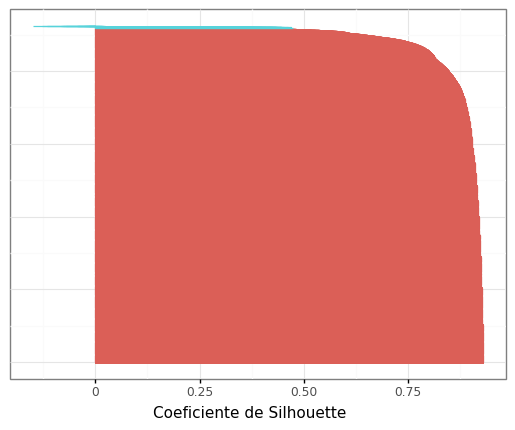

<ggplot: (125927120448)>

In [256]:
(ggplot(tempDF)+aes(y="SC",x=range(tempDF.shape[0]),color="factor(labels)")
 +geom_col(show_legend=False)+coord_flip()+theme_bw()
 +labs(y="Coeficiente de Silhouette")+theme(axis_text_y=element_blank(),axis_ticks_major_y=element_blank())
)

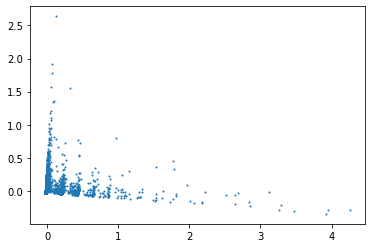

In [248]:
import matplotlib.pyplot as plt

plt.scatter(x=df_pca[:,0], y=df_pca[:,1],s=1)
plt.show()

array([  -7577.73916773, -430075.62979089,   42129.36343966, ...,
         -3120.12635338,   14848.79712274,   14146.6538558 ])